<a href="https://colab.research.google.com/github/Devyani273/Play-Store---Exploratory-Data-Analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Introduction**

***In this EDA, we will explore and analyze the given datasets based on  "Play Store Review Analysis".The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.***

**We have two datasets in this project :**

1.  **playstore data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app.

2.  **user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity**



*Firstly, let's import the required libraries. Then load the data set.*

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Mounting Drive**

In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


### **Reading both CSV Files From Drive and storing in dataframe**

In [3]:
ps_file_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/Play Store Data.csv'
ur_file_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/User Reviews.csv'
ps_ds = pd.read_csv(ps_file_path)
ur_ds = pd.read_csv(ur_file_path)

# **Exploring the Dataset**



*   **play store dataframe:**  



In [4]:
# Shape of the play store dataframe.
ps_ds.shape

(10841, 13)

In [5]:
ps_ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
ps_ds.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
ps_ds.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Description of the columns present in play store dataframe :**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

1. **App -** It tells us about the name of the application with a short description (optional).

2.  **Category -** It gives the category to the app.

3.   **Rating -** It contains the average rating the respective app received from its users.
4.   **Reviews -** It tells us about the total number of users who have given a review for the application.

5.  **Size -** It tells us about the size being occupied the application on the mobile phone.


6. **Installs -** It tells us about the total number of installs/downloads for an application.


7.   **Type -** IIt states whether an app is free to use or paid.
8.**Price -** It gives the price payable to install the app. For free type apps, the price is zero.
9.**Content Rating -** It states whether or not an app is suitable for all age groups or not.
10.**Genres -** It tells us about the various other categories to which an application can belong.
11.**Last Updated -** It tells us about the when the application was updated.
12.**Current Ver -** It tells us about the current version of the application.
13.**Android Ver -** It tells us about the android version which can support the application on its platform.




*   **user_reviews dataframe:**

In [8]:
ur_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
print(ur_ds.shape)

print(ur_ds.columns)

(64295, 5)
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


**Description of columns in user_reviews dataframe**

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

1. **App:** Contains the name of the app with a short description (optional).
2. **Translated_Review:** It contains the English translation of the review dropped by the user of the app.
3. **Sentiment:** It gives the attitude/emotion of the Review writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
4. **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive Review' and -1 means a ‘Negative Review' and 0 means 'Neutral  Review'.
5. **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

# **Data Cleaning**



*   **play store dataframe**



In [10]:
ps_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By diagnosing the data frame, we can see that:

1 - Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'

2 - Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

3 - Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

4 - Values of column 'Price' are strings representing price with symbol '$'.

Hence, we will need to do some data cleaning.

Converting
* Reviews
* Size
* Installs
* Price 

to numeric.

In [11]:
#Checking how many values are not numeric in Reviews column in the Data Frame.
ps_ds[~ps_ds['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In index number 10472 values are incorrectly filled in the dataframe. Correcting the data as per the values present in the dataframe.

In [12]:
ps_ds.loc[10472,['Category']] = 'No Category'
ps_ds.loc[10472,['Rating']] = 1.9
ps_ds.loc[10472,['Reviews']] = 19
ps_ds.loc[10472,['Size']] = '3.0M' 
ps_ds.loc[10472,['Installs']] = '1000+'
ps_ds.loc[10472,['Type']] = 'Free'
ps_ds.loc[10472,['Price']] = '0'
ps_ds.loc[10472,['Content Rating']] = 'Everyone'
ps_ds.loc[10472,['Genres']] = 'No Genres'
ps_ds.loc[10472,['Last Updated']] = 'February 11, 2018'
ps_ds.loc[10472,['Current Ver']] = '1.0.19'
ps_ds.loc[10472,['Android Ver']] = '4.0 and up'



In [13]:
#Converting Reviews column to int type from object.
ps_ds['Reviews'] = ps_ds['Reviews'].astype(int)

In [14]:
#Checking the unique values
ps_ds['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
#Converting all the data to Mb
for data in ps_ds['Size']:
  if 'k' in str(data):
    new_data = float(data[:-1])/1000
    ps_ds['Size'] = ps_ds['Size'].replace(data,new_data)
  elif 'M' in str(data):
    new_data = float(data[:-1])
    ps_ds['Size'] = ps_ds['Size'].replace(data,new_data)

In [16]:
#Converting Size column to numeric/float type
ps_ds['Size'] = ps_ds['Size'].replace("Varies with device",np.nan)
ps_ds['Size'] = pd.to_numeric(ps_ds['Size'])

In [17]:
#Converting Price column to numeric/float type
ps_ds['Price'] = pd.to_numeric(ps_ds['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [18]:
#Converting Installs column to numeric/float type.
ps_ds['Installs'] = ps_ds['Installs'].str.replace('+','')
ps_ds['Installs'] = pd.to_numeric(ps_ds['Installs'].str.replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [19]:
#Converting data in Last Updated column from string to Timestamp.
ps_ds['Last Updated'] = pd.to_datetime(ps_ds['Last Updated'])
ps_ds['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [20]:
#Checking the info of the Dataframe again to make sure the columns Datatype has been changed.
ps_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [21]:
ps_ds.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514505,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588343,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [22]:
# Checking the number of null values in each columns.
ps_ds.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [23]:
#Checking in which row of column 'Type' Null is coming.
ps_ds[ps_ds['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


***Since there is only one row in the dataset for which column 'Type' has NaN and the 'price' of the app is $0 so we can set the 'Type' to Free.***

In [24]:
#Filling NaN with 'Free' in Type column for row 9148.
ps_ds['Type'].fillna('Free',inplace = True)

***For 'Rating' and 'Size' column the best way to replace the NaN values is to replace them with the mean of the Rating and Size for each category. 
For e.g. - If NaN is present in certain row under Size which belongs to the category FAMILY then this NaN will be replaced by the mean of the app Size which belongs to the FAMILY category.
So we are replacing the NaN values based on the mean grouped by 'Category'.***

In [25]:
# Defining the function to replace the NaN value

def replacing_null_values(col1):
  ps_ds[col1].fillna(ps_ds.groupby('Category')[col1].transform('mean'),inplace=True)

In [26]:
# Replacing the NaN values from 'Rating' and 'Size'

for n in ['Size','Rating']:
 replacing_null_values(n)

In [27]:
# Checking the number of null values in each columns after removing the null values from Type, Rating and Size.
ps_ds.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

***Checking for duplicate values in the dataset.***

In [28]:
ps_ds['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

***From the above data we can infer that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will have the information for the latest entry in the database.***

In [29]:
#Sorting the dataset in descending order of Last Updated date.
ps_ds.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [30]:
# Deleting the duplicate entries of App.
ps_ds.drop_duplicates(subset = ['App'], inplace = True)



*   **Checking null values in user_reviews dataframe**




In [31]:
ur_ds.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [32]:
#Removing all the NaN value rows from user_review dataframe.
ur_ds.dropna(inplace = True)

In [33]:
ur_ds.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [34]:
# Info of the dataframes after cleaning the data.
ps_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 10712 to 7479
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   float64       
 5   Installs        9660 non-null   int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [35]:
ur_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [36]:
# Describing the data after cleaning.
ps_ds.describe()

,Rating,Reviews,Size,Installs,Price
count,9660.000000,9.660000e+03,9660.000000,9.660000e+03,9660.000000
mean,4.174428,2.167093e+05,20.257427,7.796422e+06,1.097117
std,0.495755,1.830921e+06,20.634296,5.376705e+07,16.850750
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.200000,9.680000e+02,13.310822,1.000000e+05,0.000000
75%,4.500000,2.943825e+04,27.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# **Visualizing Data**

# 1) Number of Apps present per Category

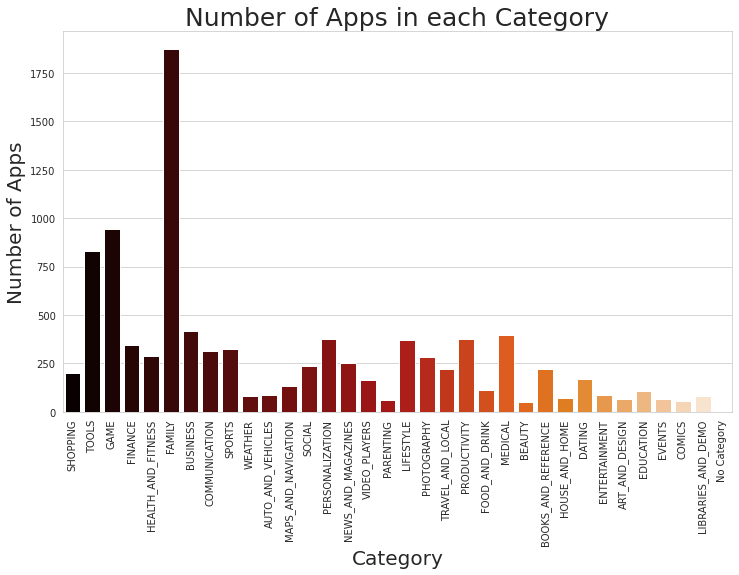

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
plt.rcParams['font.size'] = 10 
sns.countplot(x='Category',data=ps_ds , palette = 'gist_heat' )
plt.title('Number of Apps in each Category',size=25)
plt.xticks(rotation=90)
plt.ylabel('Number of Apps',size=20)
plt.xlabel('Category',size=20)
plt.show()


***From this plotting we can see that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools.***

# 2) Installs per Category

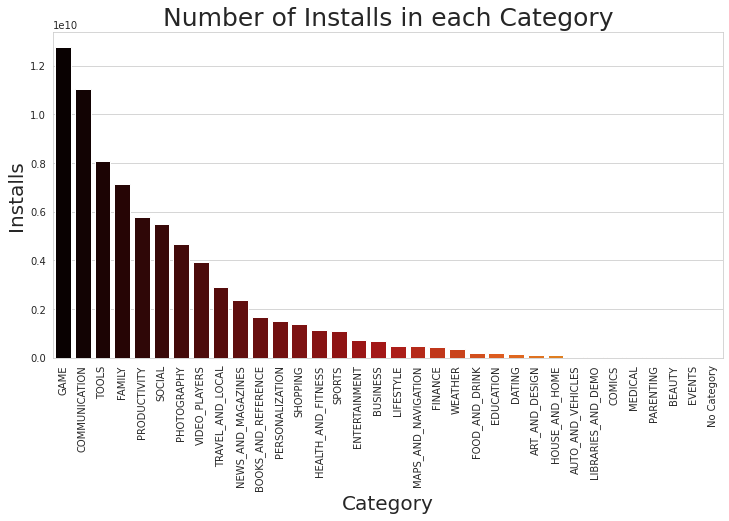

In [38]:
installs_per_category = ps_ds.groupby(['Category'])[['Installs']].sum().reset_index()
installs_per_category.sort_values(by = 'Installs', ascending = False, inplace = True)
plt.figure(figsize=(12,6))
plt.title("Number of Installs in each Category",size=25)
sns.barplot(x = 'Category', y = 'Installs', data = installs_per_category,palette = 'gist_heat')
plt.xlabel("Category",size=20)
plt.ylabel("Installs",size=20)
plt.xticks(rotation = 90)
plt.show()

***Here we can observe that the most installed apps are from 'Game',  'Communication' and 'Tools' Category.***

# 3) Boxplot to show 'Rating'

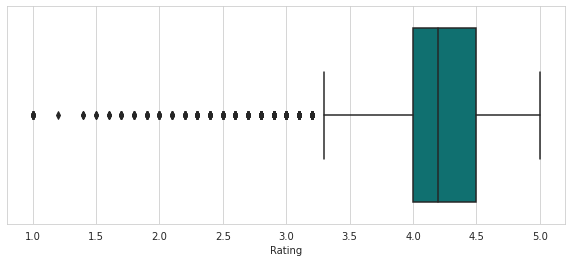

In [39]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Rating',data=ps_ds,color='teal')
plt.show()


***The plot shows that median of the 'Rating' column is 4.2. This implies that 50% of the apps have Rating more than 4.2 and rest 50% have below 4.2. This is clear that the ratings are skewed to the right indicating that majority of the categories have high rating with only a few exceptions in the low-rated apps***

# 4)  App Vs Type 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x288 with 0 Axes>

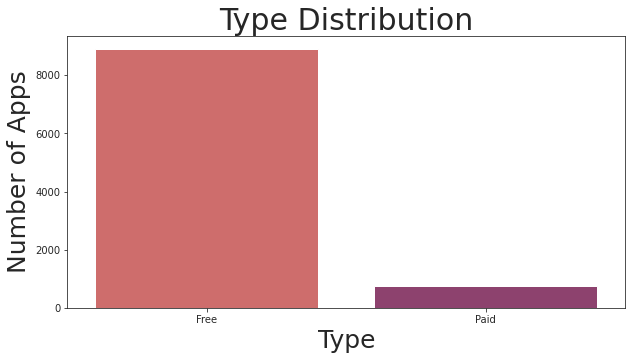

In [40]:
plt.figure(figsize=(10,4))

sns.set_style('ticks')
plt.figure(figsize=(10, 5))
sns.countplot(ps_ds['Type'],palette = 'flare' )
plt.title('Type Distribution',size=30)
plt.ylabel('Number of Apps',size=25)
plt.xlabel('Type',size=25)
plt.show()


***From the plot we can infer that majority of the apps in the Play Store are Free.***

# 5) Category Vs Size with respect to Type of App

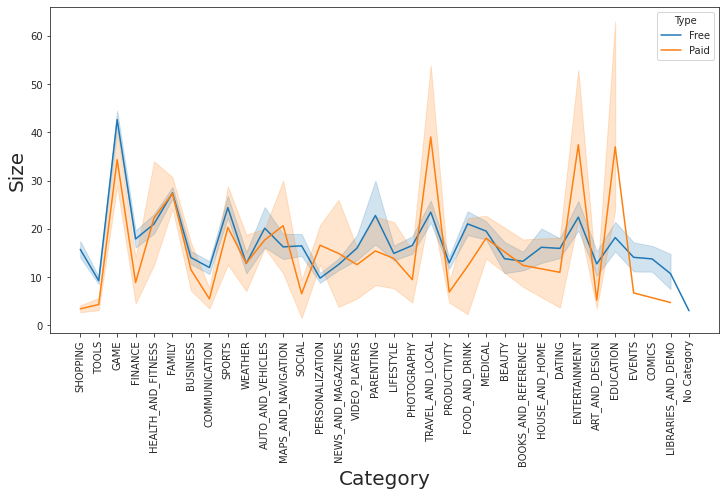

In [41]:
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 10
sns.lineplot(x='Category', y='Size', hue='Type', data=ps_ds)
plt.ylabel('Size',size=20)
plt.xlabel('Category',size=20)
plt.xticks(rotation = 90) 
plt.show()

 ***The graph shows that be it Free apps or Paid apps, majority of the apps have small size.***

# 6) Size Distribution

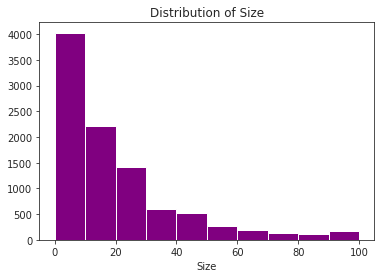

In [42]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(ps_ds['Size'],color='purple')
plt.show()

***We can see that most of the Apps have Size less than 50 MB***


# 7)Number of Apps present Vs Content Rating

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


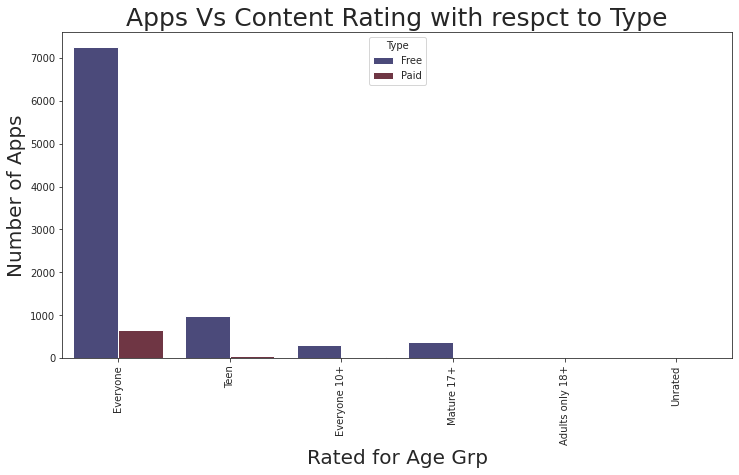

In [43]:
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (12,6)
sns.countplot(ps_ds['Content Rating'],hue = 'Type',data = ps_ds,palette= "icefire")
plt.title('Apps Vs Content Rating with respct to Type',size = 25)
plt.ylabel('Number of Apps',size=20)
plt.xlabel('Rated for Age Grp',size=20)
plt.xticks(rotation = 90)
plt.show()


***We can see that Apps with Content Rating 'Everyone' are present in huge amount.***

# 8) Installs Vs Content Rating

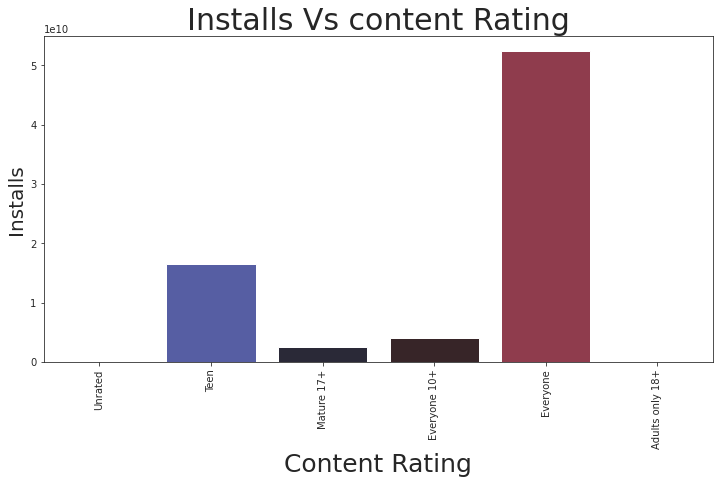

In [44]:
conrat_installs = ps_ds.groupby(['Content Rating'])[['Installs']].sum().reset_index()
conrat_installs.sort_values(by = 'Content Rating', ascending = False, inplace = True)
plt.figure(figsize=(12,6))
plt.title("Installs Vs content Rating",fontsize=30)
sns.barplot(x = 'Content Rating', y = 'Installs', data = conrat_installs,palette= "icefire")
plt.xlabel("Content Rating",size=25)
plt.ylabel("Installs",size=20)
plt.xticks(rotation = 90)
plt.show()

***It's obvious that Apps with Content Rating 'Everyone' are present in huge amount so it has the highest number of installs then next is with Content Rating 'Teen'.***

# 9) Rating Vs Content Rating

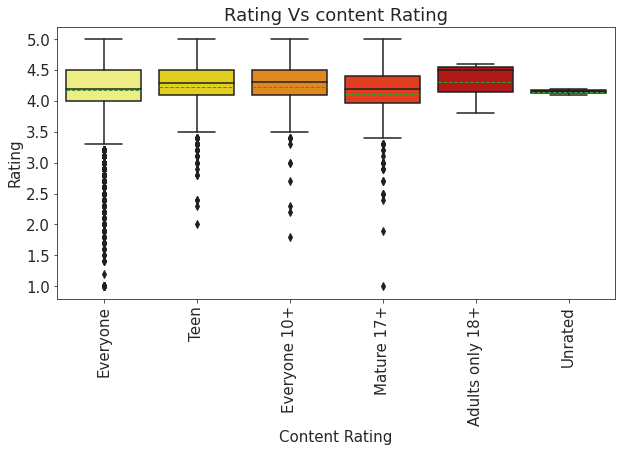

In [45]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 15
sns.boxplot(x = ps_ds['Content Rating'], y = ps_ds['Rating'], data = ps_ds, meanline = True,showmeans=True, palette='hot_r')
plt.title("Rating Vs content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()


***We can see that Apps with Content Rating 'Adults only 18+' has the highest average rating.***

# 10) Price of Paid Apps Categorywise

In [46]:
cat_price = ps_ds.groupby(['Category'])['Price'].mean().reset_index()
cat_price.sort_values(by='Price',ascending=False,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

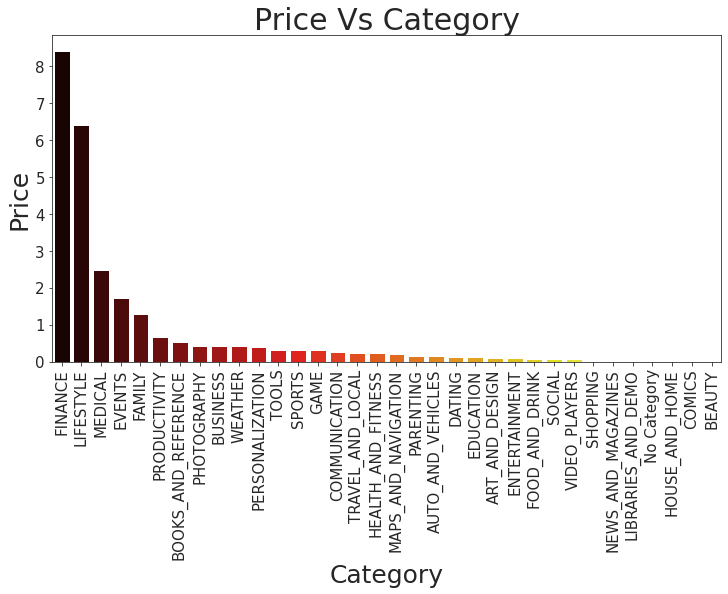

In [47]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='Category', y='Price', data=cat_price,palette='hot')
plt.title('Price Vs Category',size=30)
plt.ylabel('Price',size=25)
plt.xlabel('Category',size=25)
plt.xticks(rotation=90)

***Above plot shows that Apps that belong to ‘Finance’, 'Family' and 'Lifestyle' Categories have the highest prices.***

# 11) Top 10 Genres with highest number of Apps 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

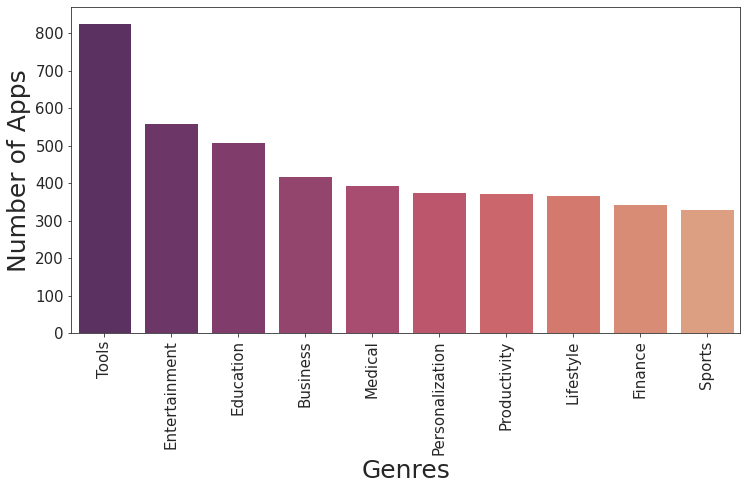

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Genres', data = ps_ds,order=ps_ds['Genres'].value_counts().head(10).index,palette='flare_r')
plt.xlabel("Genres" , size=25)
plt.ylabel("Number of Apps",size=25)
plt.xticks(rotation=90)

***There are 119 Genres on total, above plot shows only top 10 of them. We can see that most of the apps present in play store are from Genre 'Tools'.***

# 12) Top 10 most installed Genres

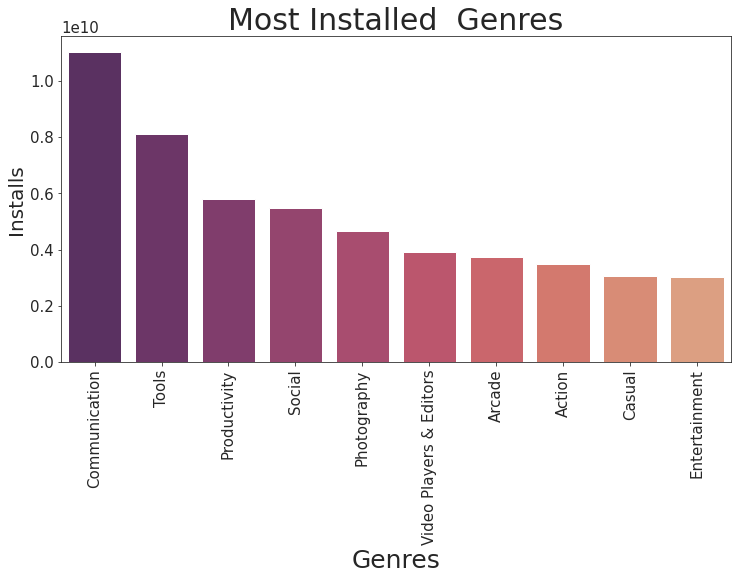

In [49]:
installed_genres = ps_ds.groupby(['Genres'])[['Installs']].sum().reset_index()
installed_genres.sort_values(by = 'Installs', ascending = False, inplace = True)
plt.figure(figsize=(12,6))
plt.title("Most Installed  Genres",fontsize=30)
sns.barplot(x = 'Genres', y = 'Installs', data =installed_genres.head(10),palette='flare_r')
plt.xlabel("Genres",size=25)
plt.ylabel("Installs",size=20)
plt.xticks(rotation = 90)
plt.show()

***The most installed Genre is   'Communication'.***

# 13) App Vs Android Version

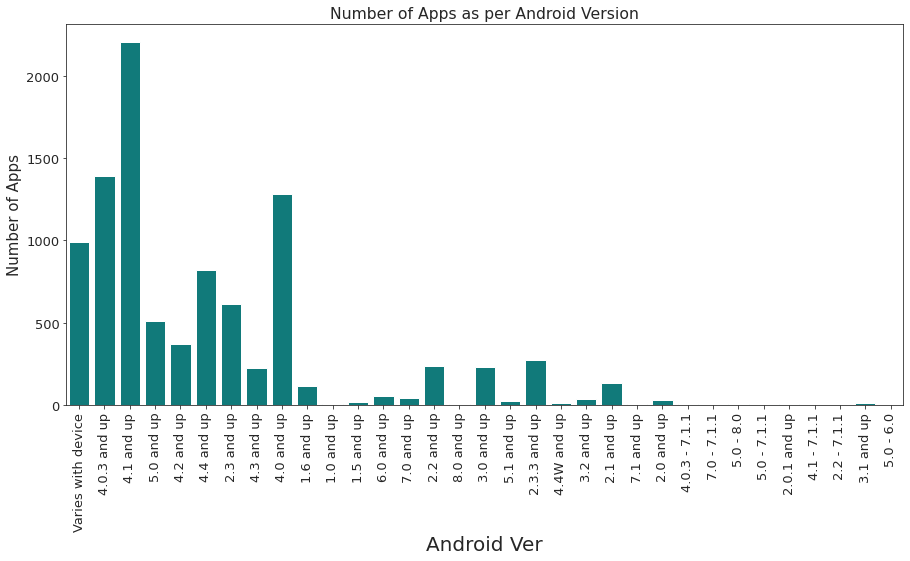

In [50]:
plt.figure(figsize=(15,7))
plt.rcParams['font.size'] = 13
plt.title("Number of Apps as per Android Version")
sns.countplot(x = 'Android Ver', data = ps_ds,color = 'darkcyan')
plt.xlabel("Android Ver",size = 20)
plt.ylabel("Number of Apps",size=15)
plt.xticks(rotation = 90)
plt.show()

***Most of the apps are having Android version '4.1 and up'***

# 14) Size Vs Rating with respect to Type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


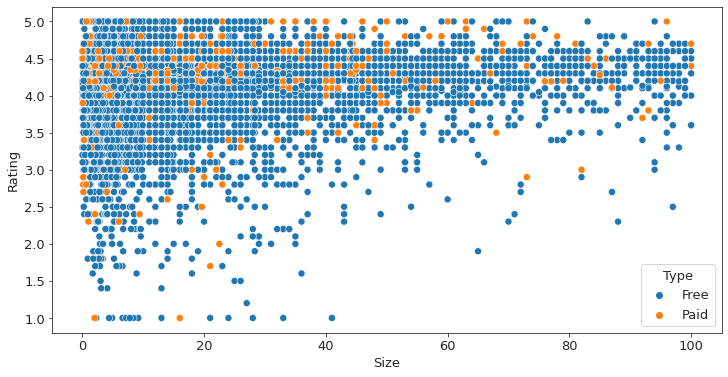

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(ps_ds['Size'],
               ps_ds['Rating'],
               hue=ps_ds['Type'],
               s=50)
plt.show()


***Above plot shows that a large number of free apps are small in size and have a high rating. Paid apps are present in very less numbers but case with their size and rating is similar to Free apps.***

#15) Correlation Heatmap for Play Store Dataset

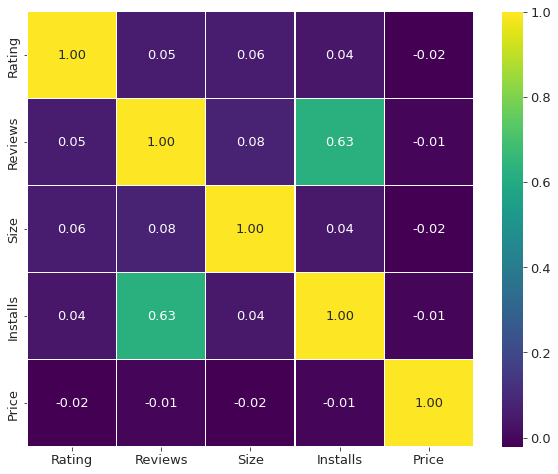

In [52]:
plt.figure(figsize = (10,8))
sns.heatmap(ps_ds.corr(), annot = True, linewidths = 0.1, fmt = '0.2f',cmap = 'viridis')
plt.show()

***It is clear from the above heatmap that Installs column is strongly positively correlated with Reviews column.***

***Size is slightly positively correlated with Installs and Reviews.***

***Price is negatively correlated with Installs, Reviews, Rating so as the price increases the number of installs, reviews, rating decreases.***

***Rating is slightly positively correlated with Installs and Reviews.***



# **Merging Both Datasets**

In [53]:
merged_ps_ur_ds = ps_ds.merge(ur_ds,on='App')

In [54]:
merged_ps_ur_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     35929 non-null  object        
 1   Category                35929 non-null  object        
 2   Rating                  35929 non-null  float64       
 3   Reviews                 35929 non-null  int64         
 4   Size                    35929 non-null  float64       
 5   Installs                35929 non-null  int64         
 6   Type                    35929 non-null  object        
 7   Price                   35929 non-null  float64       
 8   Content Rating          35929 non-null  object        
 9   Genres                  35929 non-null  object        
 10  Last Updated            35929 non-null  datetime64[ns]
 11  Current Ver             35929 non-null  object        
 12  Android Ver             35929 non-null  object

In [55]:
merged_ps_ur_ds['Sentiment'].value_counts().reset_index()

,index,Sentiment
0,Positive,23073
1,Negative,8005
2,Neutral,4851


# 16) Pie Chart for Sentiment Reviews Percentage

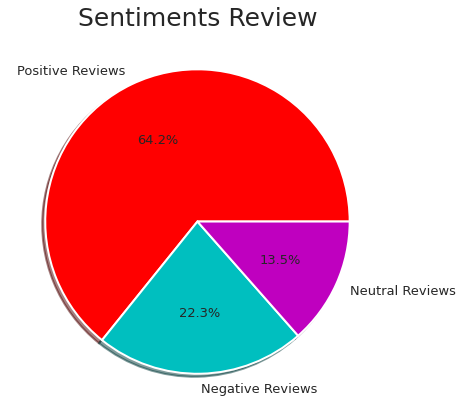

In [56]:
plt.figure(figsize = (7,7))
labels='Positive Reviews','Negative Reviews','Neutral Reviews'
merged_ps_ur_ds['Sentiment'].value_counts().plot.pie(labels=labels,shadow=True,autopct = '%.1f%%', wedgeprops={"edgecolor":"1",'linewidth': 2, 'antialiased': True},colors = [ 'r', 'c', 'm'])
plt.title('Sentiments Review',size = 25)
plt.axis('off')
plt.rcParams['font.size'] = 20
plt.show()

***This shows more than half of the Sentiment reviews are Positive.***

# 17) Category Vs Sentiment

Text(0.5, 1.0, 'Category Vs Sentiment')

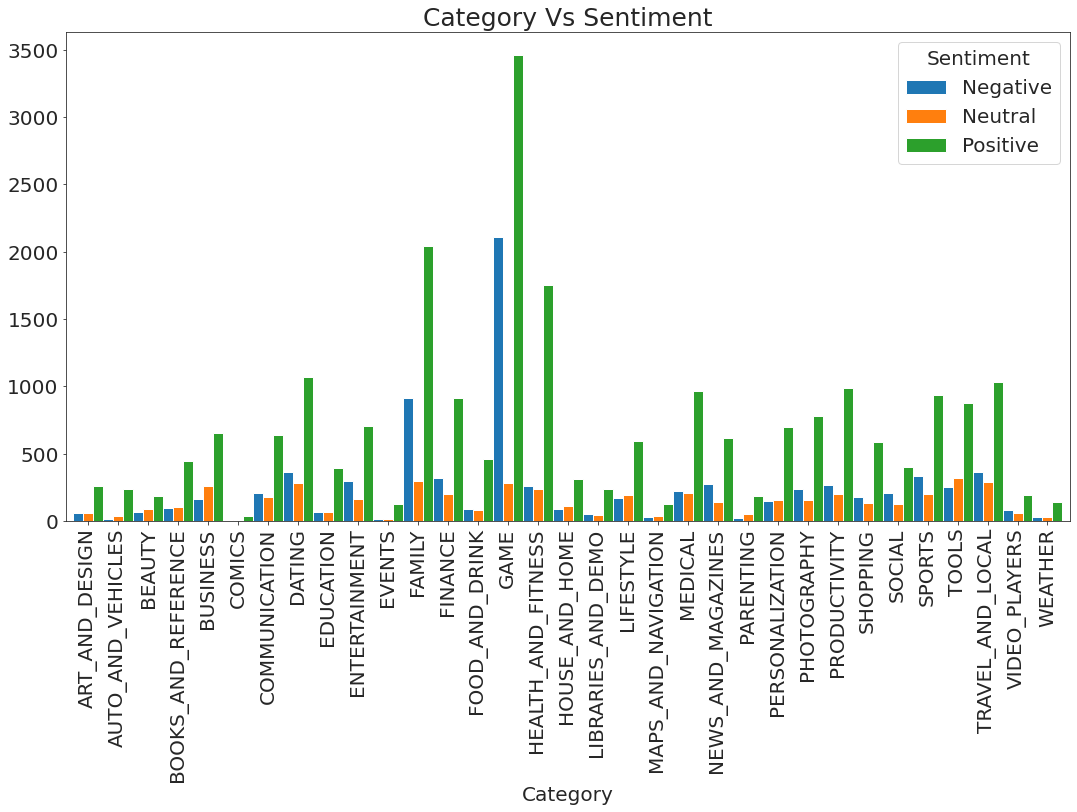

In [57]:
s = merged_ps_ur_ds.groupby(['Category','Sentiment'])['Sentiment'].size().unstack()
ax = s.plot.bar(figsize = (18,9),width = 1)
plt.rcParams['font.size'] = 15
plt.xlabel('Category',size = 20)
plt.title('Category Vs Sentiment',size = 25)

***Every Category has a large number of Positive Sentiment reviews and some Negative and Neutral Sentiment reviews.***

# 18) Distribution of Sentiment Polarity

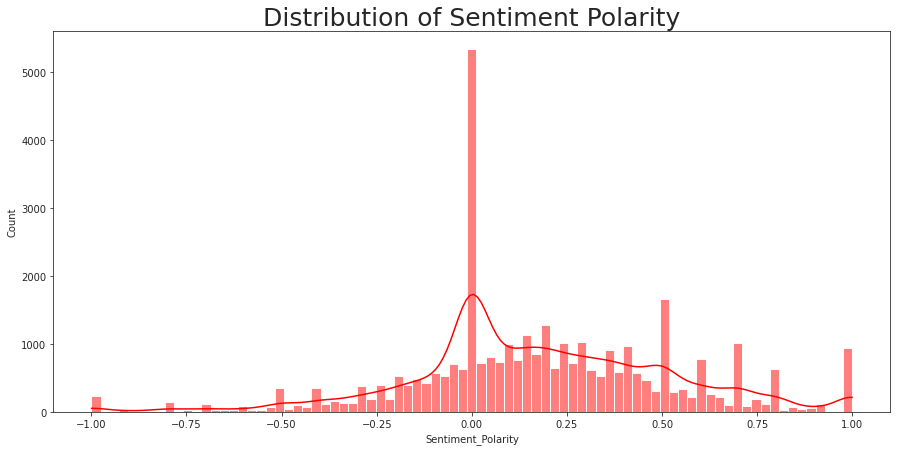

In [58]:
plt.figure(figsize=(15,7))
plt.rcParams['font.size'] = 10              
plt.title("Distribution of Sentiment Polarity",size = 25)
sns.histplot(merged_ps_ur_ds['Sentiment_Polarity'], kde = True,color = 'r')
plt.show()

***There are a large number of Sentiment Polarity betweeen -0.50 and 0.75 and also many of reviews having 0 polarity.***

# 19)Distribution of Sentiment Subjectivity

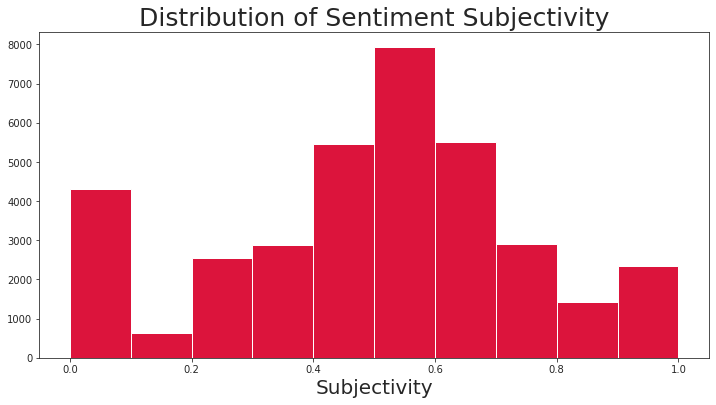

In [59]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Sentiment Subjectivity", size = 25)
plt.xlabel("Subjectivity",size = 20)
plt.hist(merged_ps_ur_ds[merged_ps_ur_ds['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'],color = 'crimson')
plt.show()

***Above Plot shows that most of the sentiment subjectivity lies between 0.4 to 0.7, this implies that maximum number of users give reviews to the applications on the basis of their experience.***



# 20) Correlation Heatmap for Merged Dataset

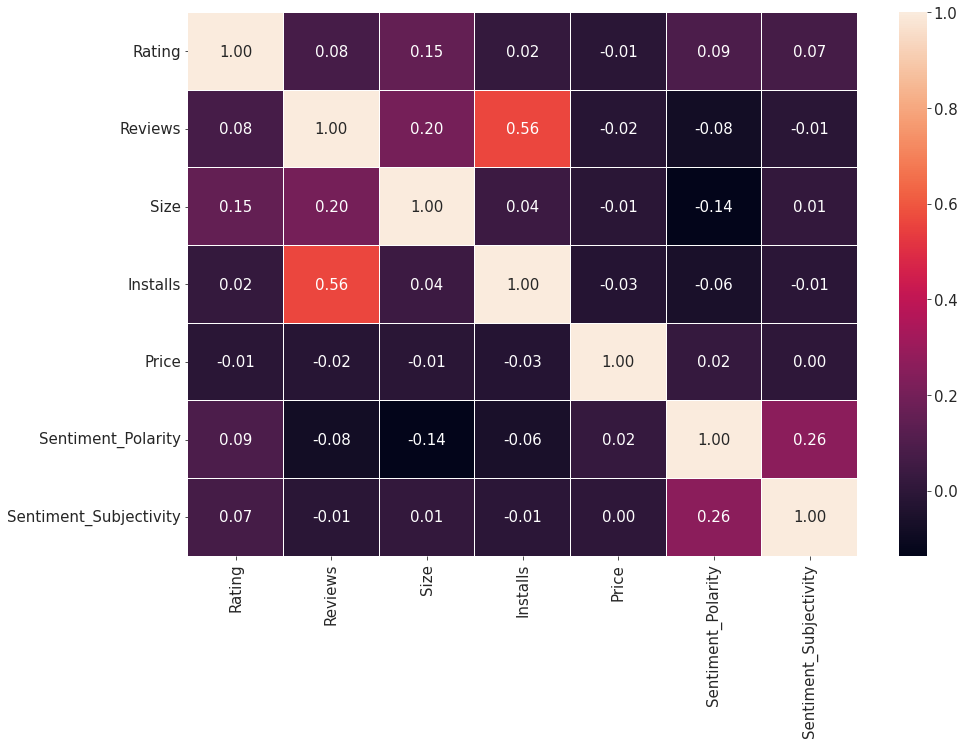

In [60]:
plt.rcParams['font.size'] = 15
plt.figure(figsize = (15,10))
sns.heatmap(merged_ps_ur_ds.corr(), annot = True, linewidths = 0.1, fmt = '0.2f')
plt.show()

***Sentiment Polarity is slightly positively correlated with Rating and Price and Sentiment Subjectivity.***

***Sentiment Subjectivity is slightly positively correlated with Rating and Size and Sentiment Polarity.***


# **Some more insights drawn from the Analysis**

# Q1 - What are the Type, name, Rating of apps with 1 Billion Installs? 

In [74]:
billion_installs=ps_ds[ps_ds['Installs']==1000000000].groupby(['Type','Content Rating','Category','App'])[['Rating']].mean().reset_index()
billion_installs

,Type,Content Rating,Category,App,Rating
0,Free,Everyone,COMMUNICATION,Gmail,4.3
1,Free,Everyone,COMMUNICATION,Google Chrome: Fast & Secure,4.3
2,Free,Everyone,COMMUNICATION,Hangouts,4.0
3,Free,Everyone,COMMUNICATION,Messenger – Text and Video Chat for Free,4.0
4,Free,Everyone,COMMUNICATION,Skype - free IM & video calls,4.1
5,Free,Everyone,COMMUNICATION,WhatsApp Messenger,4.4
6,Free,Everyone,PHOTOGRAPHY,Google Photos,4.5
7,Free,Everyone,PRODUCTIVITY,Google Drive,4.4
8,Free,Everyone,TOOLS,Google,4.4
9,Free,Everyone,TRAVEL_AND_LOCAL,Google Street View,4.2


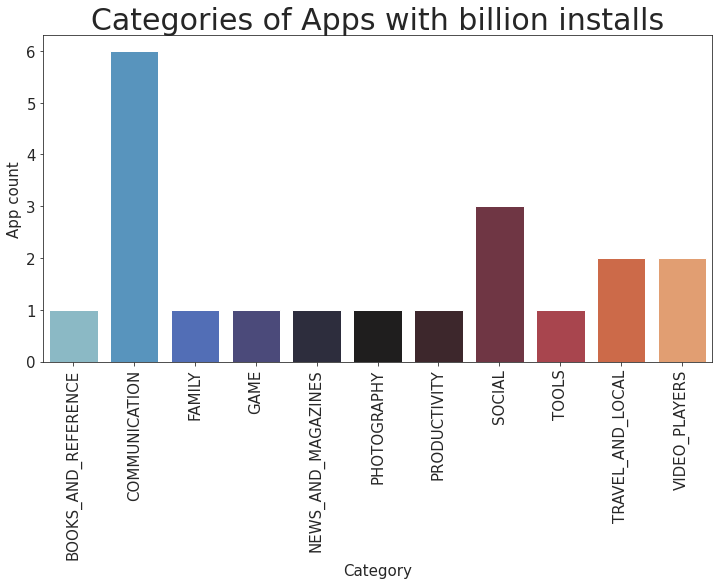

In [62]:
billions_installs=ps_ds[ps_ds['Installs']==1000000000].groupby(['Category'])[['App']].count().reset_index()

plt.figure(figsize=(12,6))
plt.title("Categories of Apps with billion installs",fontsize=30)
sns.barplot(x = 'Category', y = 'App', data = billions_installs,palette= "icefire")
plt.xticks(rotation = 90)
plt.ylabel("App count",size=15)
plt.show()

We can see there are 20 apps with 1 bilion installs and all of them are of Type 'Free' from the above Categories, clearly Communication and Social categories are trending.

## Q2 - What is the percentage of Paid apps available in play store?

In [63]:
both_type=ps_ds['Type'].value_counts()
total = ps_ds['Type'].count()
total
percentage = both_type/total * 100
percentage

Free    92.194617
Paid     7.805383
Name: Type, dtype: float64

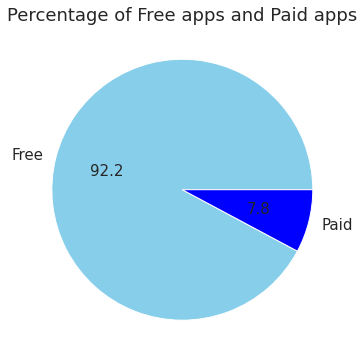

In [64]:
plt.figure(figsize = (6,6))
ps_ds['Type'].value_counts().plot.pie(autopct = '%1.1f',colors = ['skyblue','blue'])
plt.title('Percentage of Free apps and Paid apps')
plt.axis('off')
plt.rcParams['font.size'] = 20
plt.show()

# Q3 - What are the categories and names of five most reviewed Apps?

In [65]:
most_reviewedapp=ps_ds.sort_values(by='Reviews',ascending=False)
most_reviewedapp[['App','Category','Reviews','Rating']].head(5)

,App,Category,Reviews,Rating
2544,Facebook,SOCIAL,78158306,4.1
3904,WhatsApp Messenger,COMMUNICATION,69109672,4.4
3909,Instagram,SOCIAL,66509917,4.5
335,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847,4.0
3986,Clash of Clans,FAMILY,44881447,4.6


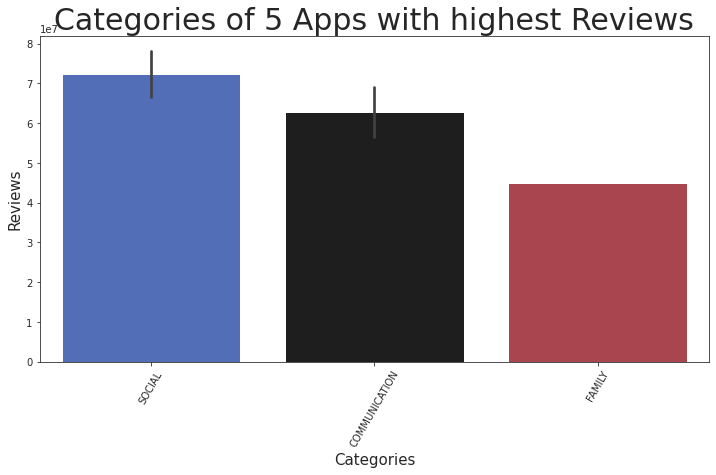

In [66]:
most_reviewed=ps_ds.sort_values(by='Reviews',ascending = False)
plt.rcParams['font.size'] = 10
plt.figure(figsize=(12,6))
plt.title("Categories of 5 Apps with highest Reviews",fontsize=30)
sns.barplot(x = 'Category', y = 'Reviews', data = most_reviewed.head(5),palette= "icefire")
plt.xlabel('Categories',size = 15)
plt.ylabel('Reviews',size = 15)
plt.xticks(rotation = 60)
plt.show()

# Q4 - What are the top 5 Apps having the higest number of Positive Sentiments review in Paid Type?


In [67]:
inst_paid_pos = merged_ps_ur_ds[merged_ps_ur_ds['Type'] == 'Paid']


In [68]:
inst_paid_pos[inst_paid_pos['Sentiment']=='Positive'].groupby(['Category','App'])[['Sentiment']].count().sort_values(by = 'Sentiment',ascending = False).reset_index().rename(columns={'App':'Apps' , 'Sentiment':'Positive Sentiment count'})


,Category,Apps,Positive Sentiment count
0,MEDICAL,Essential Anatomy 3,70
1,MEDICAL,Diabetes & Diet Tracker,66
2,FAMILY,Dr. Panda & Toto's Treehouse,56
3,PERSONALIZATION,Beautiful Widgets Pro,30
4,SPORTS,Golfshot Plus: Golf GPS,30
5,PERSONALIZATION,BIG Launcher,26
6,GAME,Farming Simulator 18,24
7,PERSONALIZATION,HD Widgets,23


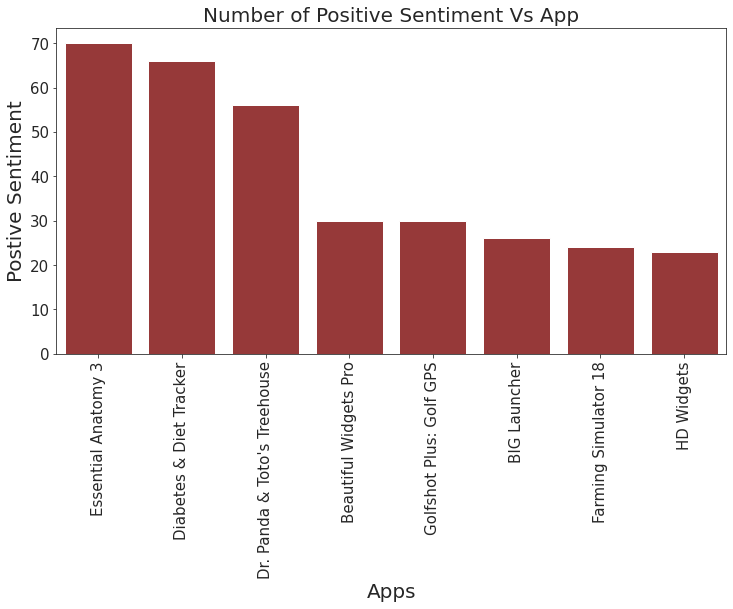

In [69]:
plotting = inst_paid_pos[inst_paid_pos['Sentiment']=='Positive'].groupby(['Category','App'])[['Sentiment']].count().sort_values(by = 'Sentiment',ascending = False).reset_index().rename(columns={'App':'Apps' , 'Sentiment':'Positive Sentiment count'})

plt.rcParams['font.size'] = 15
plt.figure(figsize=(12,6))
plt.title("Number of Positive Sentiment Vs App",fontsize=20)
sns.barplot(x = 'Apps', y = 'Positive Sentiment count', data = plotting,color = "brown")
plt.xlabel('Apps',size = 20)
plt.ylabel('Postive Sentiment',size = 20)
plt.xticks(rotation = 90)
plt.show()

**Apps with highest Positive Sentiment reviews in all Type**

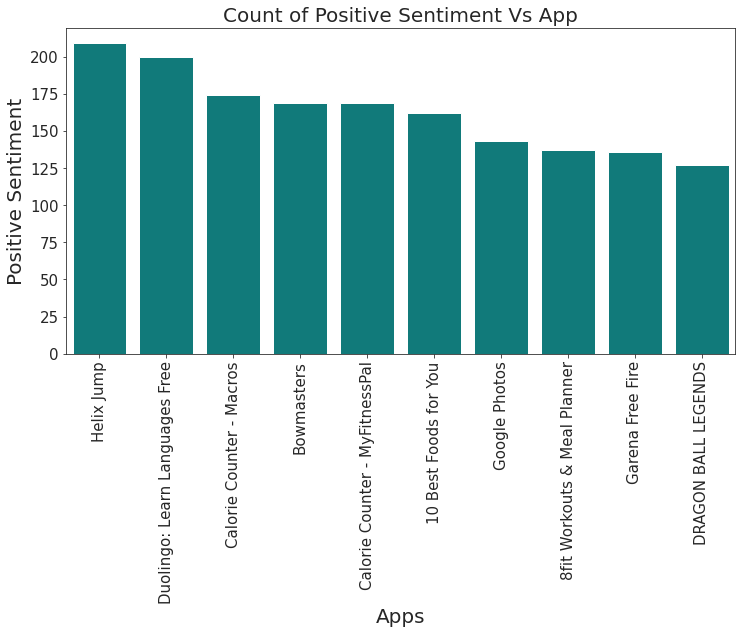

In [70]:
highest_positive_sentiments = merged_ps_ur_ds[merged_ps_ur_ds['Sentiment']=='Positive'].groupby(['Category','App'])[['Sentiment']].count().sort_values(by = 'Sentiment',ascending = False).reset_index().rename(columns={'App':'Apps' , 'Sentiment':'Positive Sentiment count'})

plt.rcParams['font.size'] = 15
plt.figure(figsize=(12,6))
plt.title("Count of Positive Sentiment Vs App",fontsize=20)
sns.barplot(x = 'Apps', y = 'Positive Sentiment count', data = highest_positive_sentiments.head(10),color = "darkcyan")
plt.xlabel('Apps',size = 20)
plt.ylabel('Positive Sentiment',size = 20)
plt.xticks(rotation = 90)
plt.show()

# Q5 - What are the 5 Apps having the highest prices ?

In [71]:
highest_price=ps_ds.sort_values(by = 'Price',ascending = False)
highest_price[['App','Category','Price']].head(5)

,App,Category,Price
4367,I'm Rich - Trump Edition,LIFESTYLE,400.00
5369,I am Rich,FINANCE,399.99
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,399.99
5359,I am rich(premium),FINANCE,399.99
5351,I am rich,LIFESTYLE,399.99


#Q6 - What are the 10 Apps having the highest number of Negative Sentiment reviews?

In [72]:
merged_ps_ur_ds[merged_ps_ur_ds['Sentiment']=='Negative'].groupby(['Genres','App'])[['Sentiment']].count().sort_values(by = 'Sentiment',ascending = False).reset_index().head(10).rename(columns={'Sentiment' :'Negative Sentiment count'})

,Genres,App,Negative Sentiment count
0,Arcade,Angry Birds Classic,147
1,Casual,Candy Crush Saga,126
2,Action,Bowmasters,119
3,Sports,8 Ball Pool,106
4,Casual,Candy Crush Soda Saga,96
5,Action,Garena Free Fire,81
6,Arcade,Cooking Fever,79
7,Action,Alto's Adventure,72
8,Puzzle,Block Puzzle,71
9,Action,Agar.io,66


# Q7 - Show the piechart graph for Content Rating.

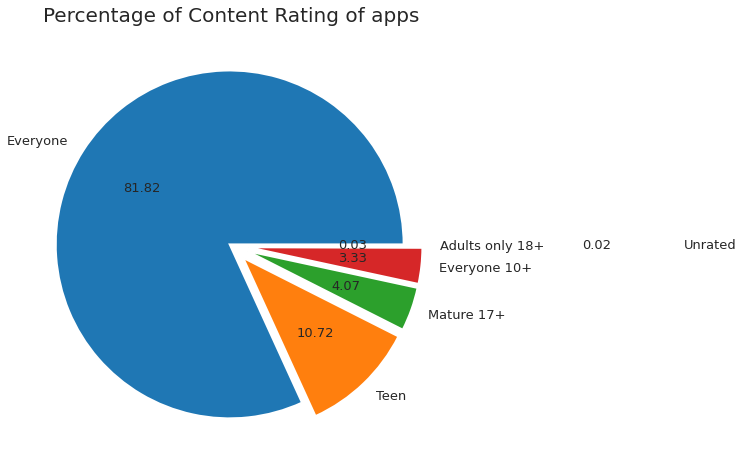

In [73]:
plt.figure(figsize = (8,8))
plt.rcParams['font.size'] = 13
exp = (0.01,0.1,0.1,0.1,0.1,1.5)
ps_ds['Content Rating'].value_counts().plot.pie(autopct = '%1.2f', explode = exp, wedgeprops={"edgecolor":"1",'linewidth': 2, 'antialiased': True})
plt.title('Percentage of Content Rating of apps',size = 20)
plt.axis('off')
plt.show()



# **Conclusion**

In this EDA, we have analysed the given two datasets and done Data Visualization to make it more understandable and to draw meaningful insights for app developers to understand user's demands and preferences better and work accordingly.Initially we focused more on the data exploring and cleaning, in order to ensure that we give them the best results out of our analysis.

From the plots, we've seen that apps from categories 'Game' and 'Communication' have a higher number of installs though are present in a very less number as compared to Category 'Family' in play store.The most installed genre is 'Communication'.

Apps with content rating 'Everyone' are present and installed in huge amount but we also observed that apps rated for 'Teen' also have a good number of installs. It shows that content rating 'Teen' needs to be explored more. Apps rated for 'Adults only 18+' has the highest average rating.

Also we noticed that users prefer Free apps more than Paid apps,the top 20 highest installed apps are all from Free type. Minecraft is the only app in the paid category with over 10M installs. Also one of the factors that matters while installing any app is Size. The apps whose size varies with device has the highest number average app installs.

Most of the apps that are having large number of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans etc indicating the active participation of users on these apps.
Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL are having the highest number of installs, rating and reviews , they are not appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). We analysed that users like apps mostly from categories involving either assisting, communicating or entertaining .

Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews.Collection of reviews shows a wide range of subjectivity and most of the reviews fall in [-0.50,0.75] polarity scale implying that the extremely negative or positive sentiments are significantly low.
Sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.




